Import All Libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


Load Data

In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Data Analysis : EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

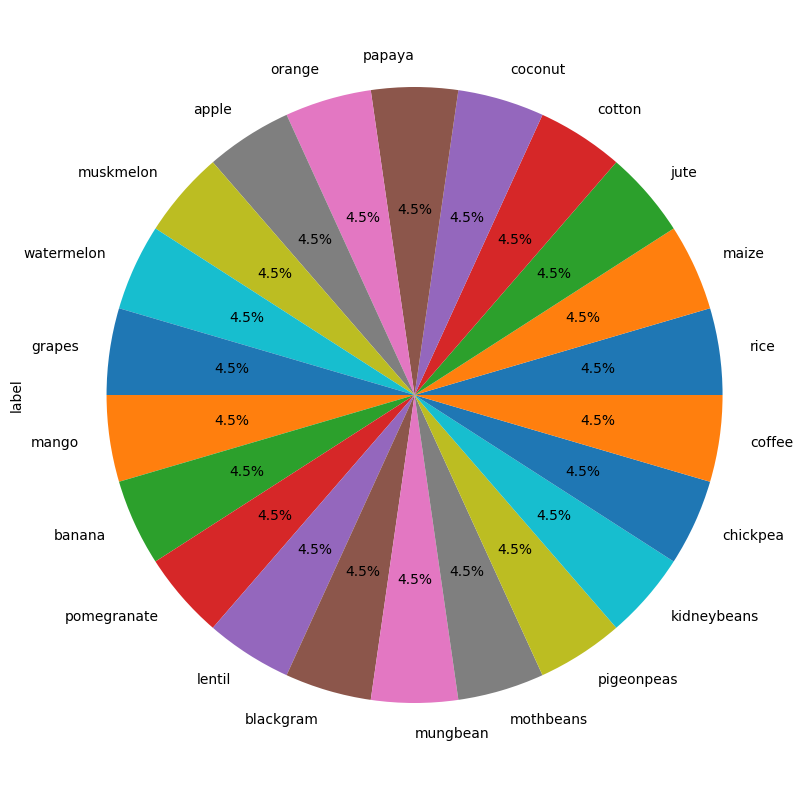

In [ ]:
plt.figure(figsize=(10,10))
df['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()

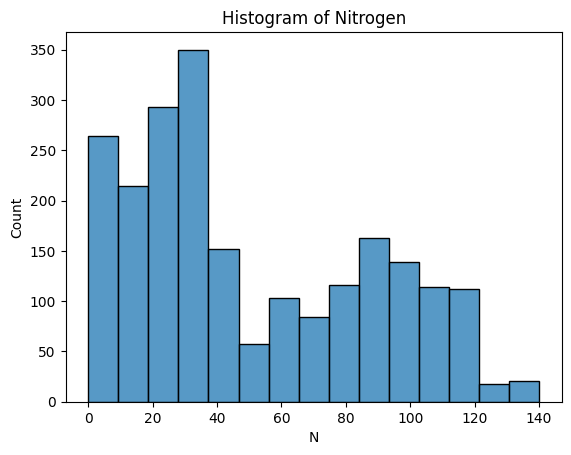

In [ ]:
sns.histplot(df['N'])
plt.title('Histogram of Nitrogen')
plt.show()

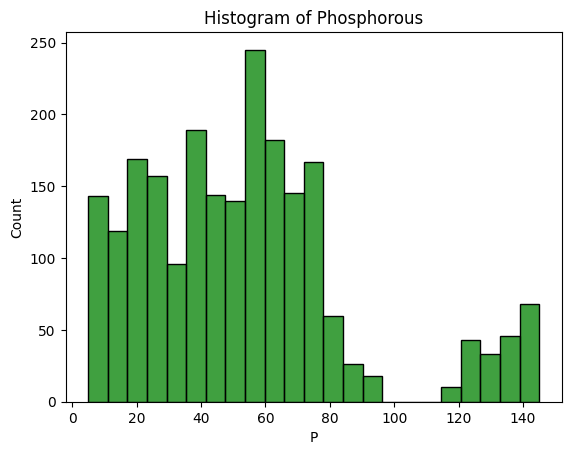

In [ ]:
sns.histplot(df['P'],color='Green')
plt.title('Histogram of Phosphorous')
plt.show()

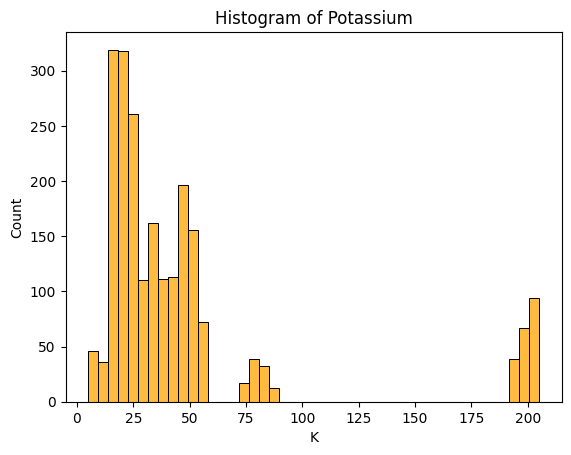

In [ ]:
sns.histplot(df['K'],color='Orange')
plt.title('Histogram of Potassium')
plt.show()

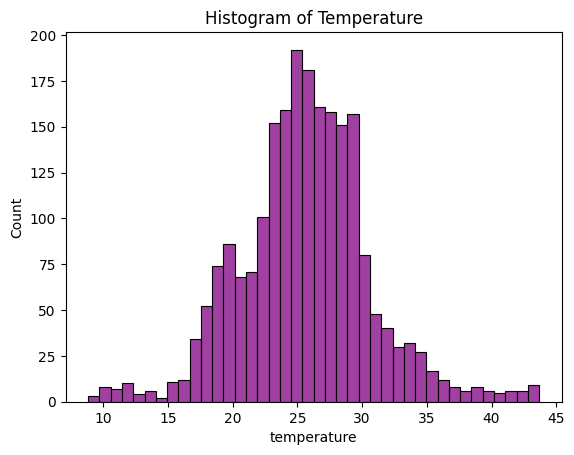

In [ ]:
sns.histplot(df['temperature'],color='Purple')
plt.title('Histogram of Temperature')
plt.show()

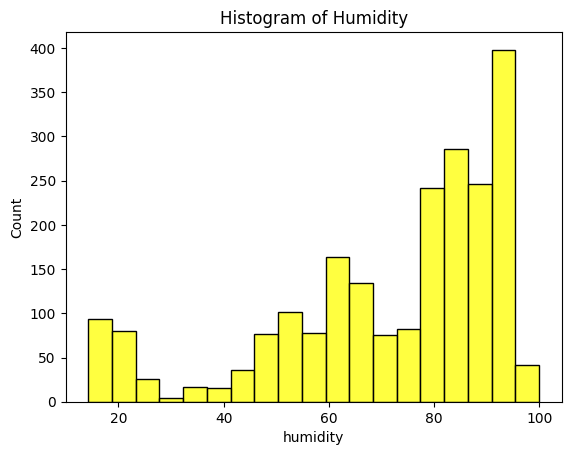

In [ ]:
sns.histplot(df['humidity'],color='Yellow')
plt.title('Histogram of Humidity')
plt.show()

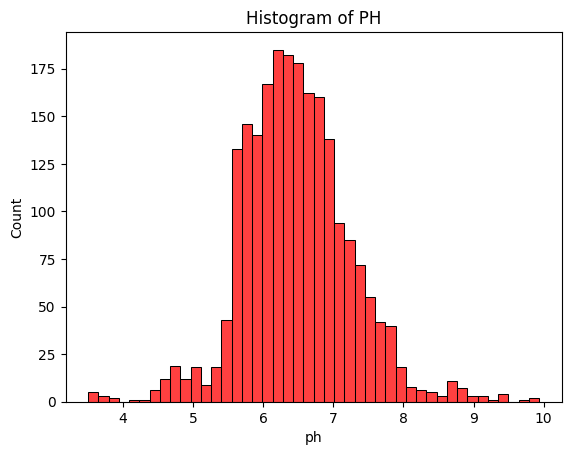

In [ ]:
sns.histplot(df['ph'],color='Red')
plt.title('Histogram of PH')
plt.show()

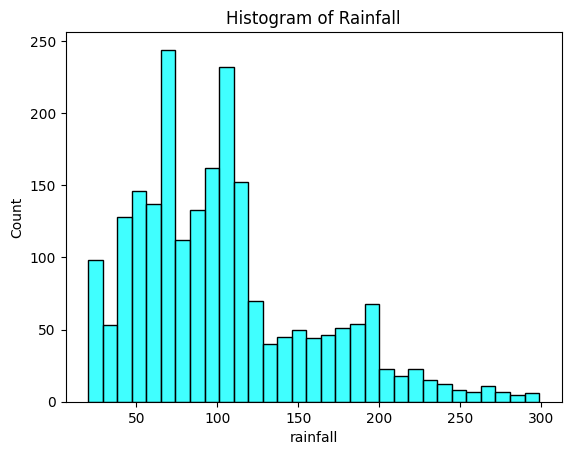

In [ ]:
sns.histplot(df['rainfall'],color='Cyan')
plt.title('Histogram of Rainfall')
plt.show()

KDE Plot

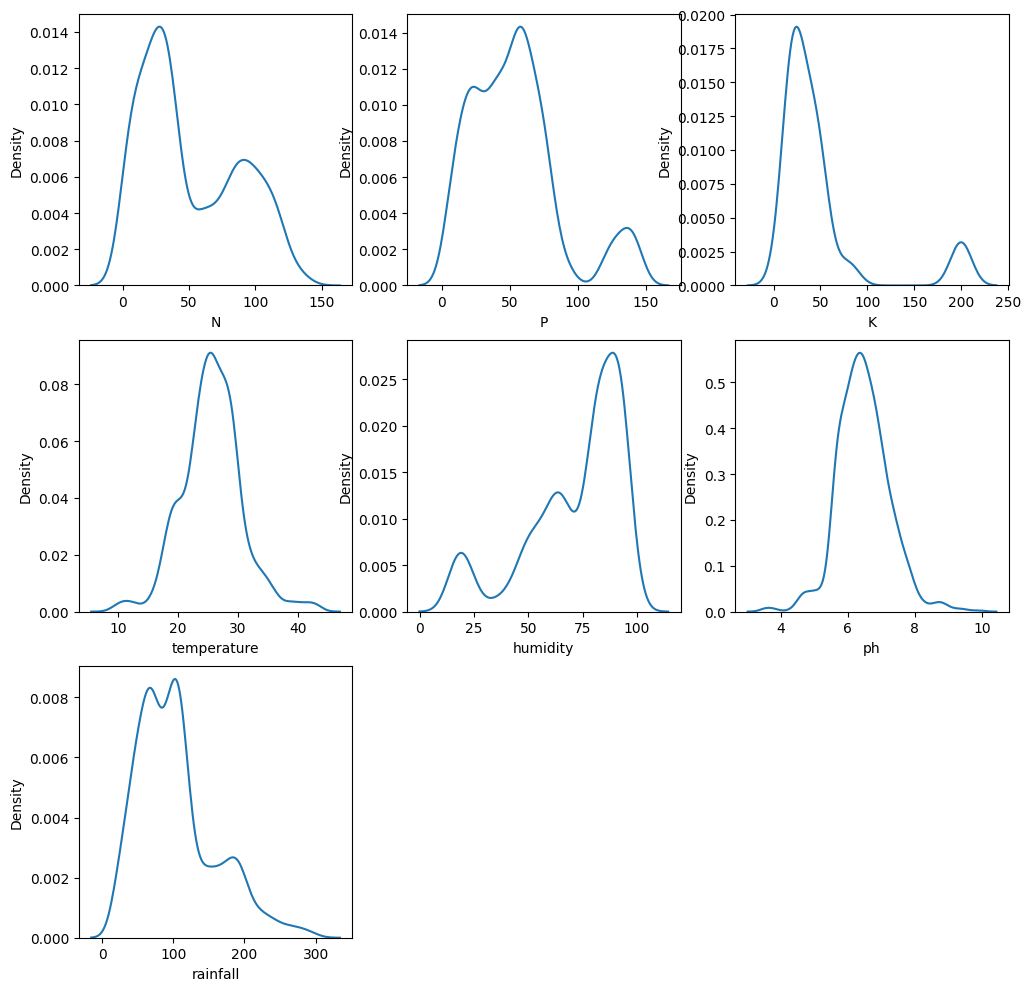

In [ ]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(3,3,i)
    sns.kdeplot(df[col])
    i+=1

In [ ]:
import scipy.stats as sm

QQ- Plot

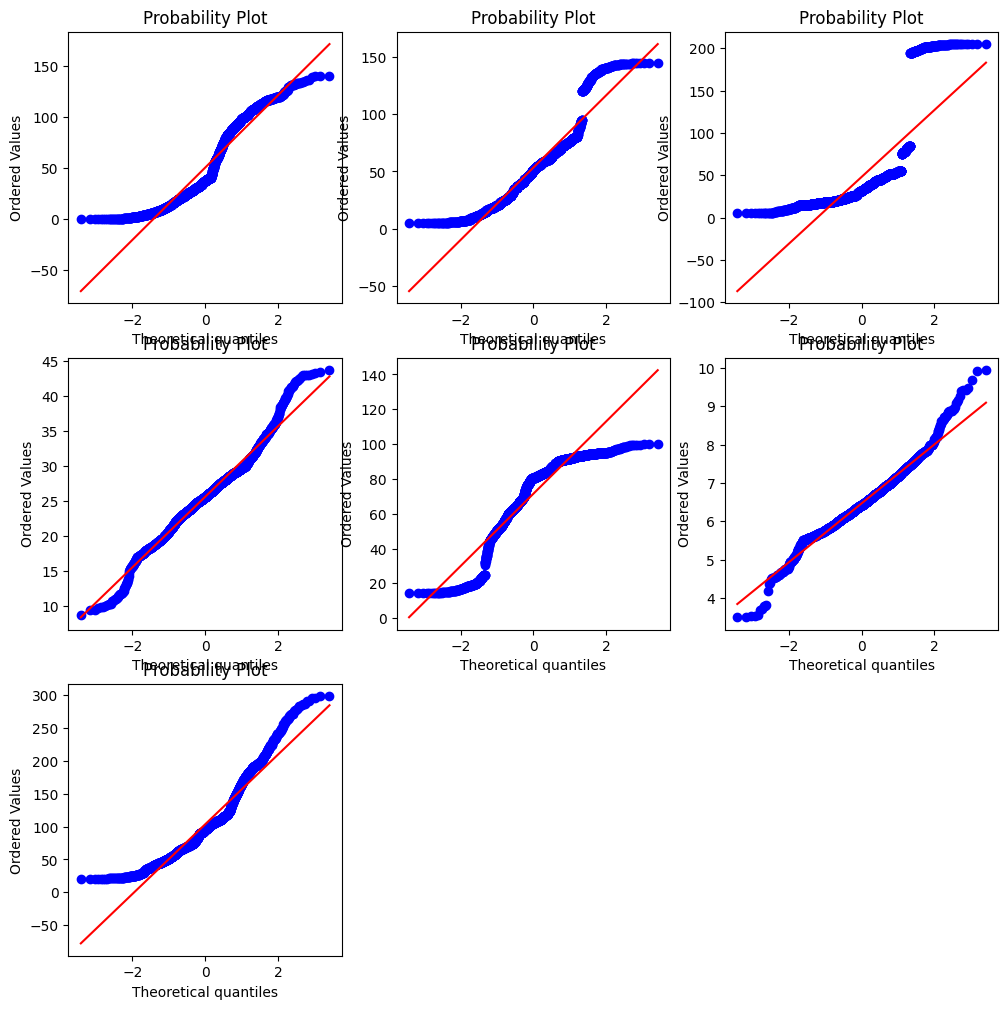

In [ ]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(3,3,i)
    sm.probplot(df[col],dist='norm',plot=plt)
    i+=1

Outliers Detection

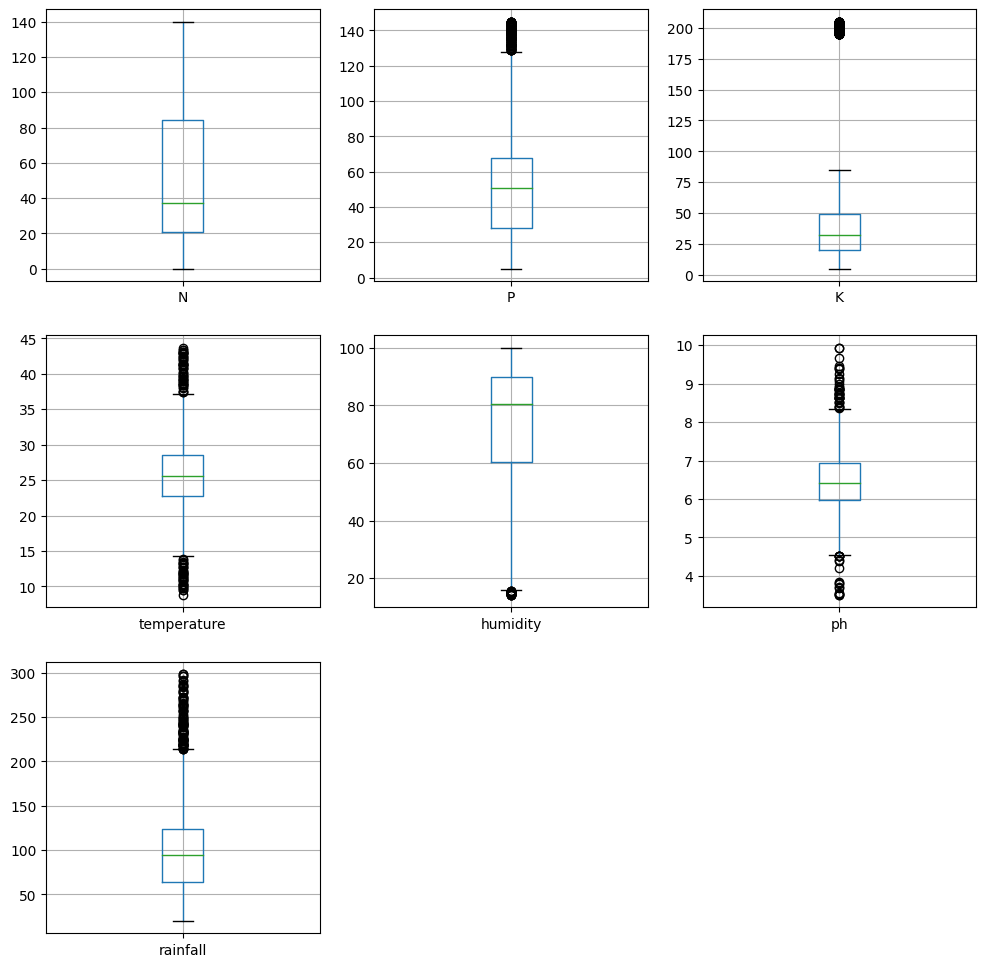

In [ ]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

Skewness in data

In [ ]:
df.iloc[:,:-1].skew()

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

Target Column

In [ ]:
class_labels = df['label'].unique().tolist()
class_labels

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
df['label']

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [ ]:
class_labels = le.classes_
class_labels

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


Split The Data

In [ ]:
x = df.drop('label',axis=1)
y = df['label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1980, 7)
(220, 7)
(1980,)
(220,)


Build Model

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

Hyperparameter Tunning

In [ ]:
rf = RandomForestClassifier()
param_grid = {'n_estimators':np.arange(50,200),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,25),
    'min_samples_split':np.arange(2,25),
    'min_samples_leaf':np.arange(2,25)}

rscv_model = RandomizedSearchCV(rf,param_grid, cv=5)
rscv_model.fit(x_train,y_train)
rscv_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=19, min_samples_leaf=2,
                       min_samples_split=9, n_estimators=86)

Model Evaluation on Test Data

In [ ]:
new_rf_model = rscv_model.best_estimator_

y_pred = new_rf_model.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

In [ ]:
y_pred_train = new_rf_model.predict(x_train)

print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_train))

Confusion Matrix:
 [[92  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 91  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 94  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 94  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 89  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 92  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 88  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 86  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 86  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 87  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 93  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 87  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

In [ ]:
y_test.values[:10]

array([21,  0,  9, 16, 15,  4, 17,  5, 14, 16])

In [ ]:
y_pred[:10]

array([21,  0,  9, 16, 15,  4, 17,  5, 14, 16])

In [ ]:
import json
import pickle
import os

In [ ]:
class_labels

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [ ]:
label_dict = {}
for index,label in enumerate(class_labels):
    label_dict[label] = index
print(label_dict)

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [ ]:
df.columns.tolist()

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

In [ ]:
features_data = {'columns':list(x.columns)}
features_data

{'columns': ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']}

In [ ]:
features_data['columns']

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [ ]:
with open('new_rf_model.pickle','wb') as file:
    pickle.dump(new_rf_model, file)

In [ ]:
with open('features_data.json','w') as file:
    json.dump(features_data,file)

In [ ]:
len(features_data['columns'])

7

Taking User Inputs

In [ ]:
test_series = pd.Series(np.zeros(len(features_data['columns'])),index=features_data['columns'])
test_series

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
dtype: float64

In [ ]:
test_series['N'] = 90
test_series['P'] = 42
test_series['K'] = 43
test_series['temperature'] = 25
test_series['humidity'] = 86
test_series['ph'] = 6.5
test_series['rainfall'] = 220

test_series

N               90.0
P               42.0
K               43.0
temperature     25.0
humidity        86.0
ph               6.5
rainfall       220.0
dtype: float64

In [ ]:
output = new_rf_model.predict([test_series])[0]
print("Recommended Crop:",class_labels[output])

Recommended Crop: rice


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
